In [1]:
import numpy as np
import numpy.matlib
import matplotlib.pyplot as plt
from scipy.spatial.distance import euclidean
from matplotlib import style;  style.use('ggplot')
from sklearn.datasets.samples_generator import make_blobs

In [62]:
X, y = make_blobs(n_samples=20, centers=3, n_features=2)

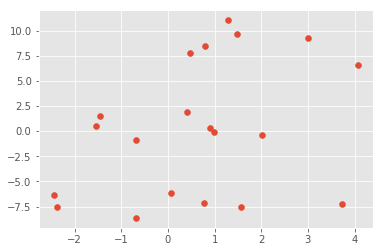

In [63]:
plt.scatter(X[:,0], X[:,1])
plt.show()

In [26]:
colors = 10*['g', 'c', 'b', 'k']

In [49]:
class BSAS:
    def __init__(self, theta=None, q=None):
        # theta: Dissimarity Threshold
        # q: Max #Clusters
        self.theta = theta; self.q = q
        self.clusters = {}; self.centroids = {}
        
    def __getCentroid(self, X, Y):
        try:
            probe = Y[1]
            return np.divide(X, Y[0])
        except:
            return X
    
    def __findClosestCluster(self, clusters, centroids, sample):
        centID = 0
        cluster_population = clusters[centID].shape
        centroid = self.__getCentroid(centroids[centID], cluster_population)
#         try:
#             centroid = np.divide(centroids[centID], cluster_population[1])
#         except:
#             centroid = centroids[centID]
        minDist = euclidean(centroid, sample)
        try:
            for cntID in centroids:
                if (cntID == 0):
                    continue
                cluster_population = clusters[cntID].shape
                centroid = self.__getCentroid(centroids[cntID], cluster_population)
#                 centroid = np.divide(centroids[cntID], cluster_population)
                tmp = euclidean(centroid, sample)
                if (tmp < minDist):
                    minDist = tmp
                    centID = cntID
        except:
            pass
        return minDist, centID
    
    def fit(self, data, order):
        m = 1 #Clusters/Centroids
        clusters = {}; centroids = {}
        
        first_sample = data[:,order[0]]
        clusters[m-1] = first_sample; centroids[m-1] = np.add(np.zeros_like(first_sample), first_sample)
        
        N, l = data.shape
        for i in range(1,l):
            sample = data[:,order[i]]
            dist, k = self.__findClosestCluster(clusters, centroids, sample)
            if ((dist > self.theta) and (m < self.q)):
                m += 1
                clusters[m-1] = sample; centroids[m-1] = np.add(np.zeros_like(sample), sample)
            else:
                clusters[k] = np.vstack((clusters[k], sample))
                centroids[k] = np.add(centroids[k], sample)
            
        self.clusters = clusters
        self.centroids = centroids
        
    def predict(self):
        final_centroids = {}
        for key in self.clusters:
            final_centroids[key] = self.__getCentroid(self.centroids[key], self.clusters[key].shape)
        return self.clusters, final_centroids

In [70]:
clf = BSAS(theta=7,q=5)
order = np.random.permutation(range(X.shape[0]))
clf.fit(X.copy().T, order)

In [71]:
clusters, centroids = clf.predict()

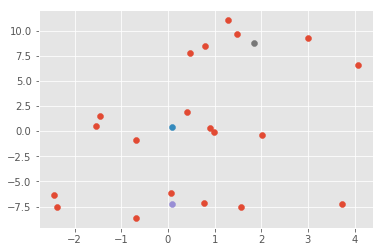

In [72]:
plt.scatter(X[:,0], X[:,1])
for key in centroids:
    centroid = centroids[key]
    plt.scatter(centroid[0], centroid[1])
plt.show()